# Generative Models for Classification

In previous lectures, we have seen **discriminative models** (like Logistic Regression). These models have one goal: learn the *decision boundary* between classes. They directly model the conditional probability $P(Y=k | X=\mathbf{x})$.

Recall that in this stage $Y$ is discrete and finite (our classes), while $X$ can be either continuous or discrete, scalar or multidimensional.

In this lecture, we will learn about a completely different family of classifiers: **generative models**.

Generative models do not care about the decision boundary. Instead, their goal is to **learn the "story" or "profile" of each class independently**. They aim to build a full probabilistic model of what each class *looks like*.

Technically, this means they model the **joint probability distribution** $P(X,Y)$. Recalling that $P(X,Y)=P(X|Y)P(X)$, they do this by modeling two separate pieces:
1.  **The Likelihood $P(X=\mathbf{x} | Y=k)$:** "What does a typical $X$ look like *for this class*?"
2.  **The Prior $P(Y=k)$:** "How common is *this class* in general?"

Once the model has learned these two things, it can be used for classification.

## The Core Principle: Maximum A Posteriori (MAP)

Generative classifiers are built on the **Maximum A Posteriori (MAP)** principle. We want to find the class $k$ that is *most probable* after we observe the data $\mathbf{x}$.

$$h(\mathbf{x}) = \arg \max_{k} P(Y=k | X=\mathbf{x})$$

Using Bayes' theorem, we can "flip" this equation to use the *generative* pieces we've learned:

$$h(\mathbf{x}) = \arg \max_{k} \frac{P(X=\mathbf{x} | Y=k) P(Y=k)}{P(X=\mathbf{x})}$$

We note that, if we are not interested in computing the actual probabilities $P(Y=k|\mathbf{x})$, but we only want to assign $\mathbf{x}$ to the most likely class, we can drop the evidence $P(X=\mathbf{x})$, which is independent of class $k$. Indeed we note that:

$$P( Y=k | \mathbf{x} ) \propto P( X | Y=k )P(Y=k)$$

Which leads to the final MAP classification rule:

$$h\left( \mathbf{x} \right) = \arg \max_{k} \underbrace{P( X | Y=k )}_{\text{Likelihood}} \underbrace{P(Y=k)}_{\text{Prior}}$$

This approach is known as Maximum A Posteriori (MAP) classification as we aim to maximize the posterior probability.

In order to implement this principle, we need to compute the following two quantities:

-   The likelihood $P(X|Y)$;
-   The prior $P(Y)$;

We will now see how to compute each of these quantities.

### The Prior $P(Y)$

$P(Y)$: this is the **prior probability of a given class**. If observing
a class $Y=k$ is not very common, then $P(Y=k)$ will be small. We can use
different approaches to estimate $P(Y=k)$:

-   We can estimate $P(Y=k)$ by **considering the number of examples in
    the dataset**. For instance, if our dataset contains $800$ non-spam
    e-mails and $200$ spam e-mails and we set `Class 0 = Spam` and `Class 1 = Non Spam`,
     we can assume that $P(Y=0) = 0.2$ and $P(Y=1) = 0.8$.

-   Alternatively, we could ***study* what is the proportion of examples
    in each class in the real world**. In the case of spam detection, we
    could ask a large sample of people how many e-mails they receive in
    average and how many spam e-mails they receive. These numbers can be
    used to define the prior probability.

-   Another common choice, when we don't have enough information on the
    phenomenon is to **assume that all classes are equally probable**,
    in which case $P(Y=k) = \frac{1}{m}$*,* where $m$ is the number of
    classes.

There are many ways to define the prior probability. However, it should
be considered that this quantity should be interpreted in Bayesian
terms. This means that, by specifying a prior probability, we are
introducing our **degree of belief** on what classes are more or less
likely in the system.

### The Likelihood $P(X|Y)$

While estimating the prior is easy and estimating the evidence is not necessary for classification purposes (it would be indeed necessary if we were to compute probabilities), computing the likelihood term is less straightforward.

If we have $M$ different classes, a general approach to estimate the likelihood consists in group all observations belonging to a given class $Y=k$ (let's call $X_{k}$ the random variable of the examples
belonging to this group) and estimate the probability $P\left( X_{k} \right)$.

If we repeat this process for every possible value of $C$, we have
concretely estimated $P(X|Y=k)$ as:

$$P\left( X = x \middle| Y = k \right) = P(X_{k})$$

To estimate $P(X_{k})$ we will generally need to make a few assumptions. Depending on such assumptions, we obtain different generative models.

## Joint Probability MAP Classification
We will now see a simple application of the MAP principle which makes use of the direct estimation of the probability $P(X|Y)$ in the case of discrete features. In particular, we will consider an example with two discrete features, so that we have to estimate $P(X_1,X_2|Y)$.

Let's say we want to classify emails as **Spam** or **Ham (Not Spam)** based on the presence of the following words:
- **Offer (F1):** Yes/No
- **Free (F2):** Yes/No

Each of these can be considered a binary feature which can either be present or not. Hence both Offer and Free have two possible values "Yes" and "No".

### Step 1: Prior Probabilities

Let's start by computing prior probabilities. Counting the number of e-mails in the database, we find the following picture.

| Class  | Prior Probability \( P(Y) \) |
|--------|------------------------------|
| Spam   | $ P(Y=\text{Spam}) = 0.6 $   |
| Ham    | $ P(Y=\text{Ham}) = 0.4 $    |

### Step 2: Contingency Tables
We now want to estimate the probabilities $P(X_1,X_2|Y)$. One way to do it is to estimate the two following joint probabilities:

* $P(Offer,Free|Spam)$
* $P(Offer,Free|Ham)$

We will estimate each of them with a contingency table.

**Spam Class Contingency Table**

Let's say we obtain the following "spam" contingency table:

| | **Free (F2)** = Yes  | **Free (F2)** = No   | Total |
|---------------|------|------|-------|
| **Offer (F1)** = Yes  | 30   | 10   | 40    |
| **Offer (F1)** = No   | 20   | 10   | 30    |
| **Total**          | 50   | 20   | 70    |

This is obtained by looking at co-occurrences of features for elements in the "spam class".

**Ham Class Contingency Table**

Similarly, we obtain the "ham" contingency table:

| |**Free (F2)** = Yes  | **Free (F2)** = No   | Total |
|---------------|------|------|-------|
| **Offer (F1)** = Yes  | 5    | 15   | 20    |
| **Offer (F1)** = No   | 10   | 30   | 40    |
| **Total**          | 15   | 45   | 60    |


### Step 3: Normalize Counts to Obtain Joint Probabilities
We can now normalize counts to obtain joint probabilities:


**Normalized Probabilities for Spam Class**

| | **Free (F2)** = Yes           | **Free (F2)** = No            | Total |
|---------------|---------------|---------------|-------|
| **Offer (F1)** = Yes  | $ \frac{30}{70} = 0.429 $ | $ \frac{10}{70} = 0.143 $ | 0.571 |
| **Offer (F1)** = No   | $ \frac{20}{70} = 0.286 $ | $ \frac{10}{70} = 0.143 $ | 0.429 |
| **Total**          | 0.714         | 0.286         | 1     |

**Normalized Probabilities for Ham Class**

| | **Free (F2)** = Yes           | **Free (F2)** = No            | Total |
|---------------|---------------|---------------|-------|
| **Offer (F1)** = Yes  | $ \frac{5}{60} = 0.083 $  | $ \frac{15}{60} = 0.250 $ | 0.333 |
| **Offer (F1)** = No   | $ \frac{10}{60} = 0.167 $ | $ \frac{30}{60} = 0.500 $ | 0.667 |
| **Total**          | 0.250         | 0.750         | 1     |


We now have all we need to implement an MAP classifier.

### Step 4: Inference for a New Email Observation
Let's see how to classify an email with the following characteristics:
- **Offer = Yes**
- **Free = Yes**


Applying the MAP rule, we obtain:

**For Spam:**

$$P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto P(\text{Spam}) \times P(\text{Yes, Yes} \mid \text{Spam})$$

$$P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto 0.6 \times 0.429 = 0.257$$

**For Ham:**

$$P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto P(\text{Ham}) \times P(\text{Yes, Yes} \mid \text{Ham})$$

$$P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto 0.4 \times 0.083 = 0.033$$

We note that:

$$P(\text{Spam}) P(\text{Yes, Yes} \mid \text{Spam}) > P(\text{Ham}) P(\text{Yes, Yes} \mid \text{Ham})$$

Hence, we can classify the example as **Spam**.

While this is not required in MAP classification, in this case, it is also easy to compute the actual probabilities:

$$
P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) = \frac{0.257}{0.257 + 0.033} = \frac{0.257}{0.29} \approx 0.886
$$

$$
P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) = \frac{0.033}{0.257 + 0.033} = \frac{0.033}{0.29} \approx 0.114
$$

## Quadratic Discriminant Analysis for Continuous Features
If our features are continuous (e.g., `height`, `weight`), we can't build a table.

One possibility is to model $P(X=\mathbf{x} | Y=k)$ as a **Multivariate Gaussian (Normal) Distribution**. This is a distribution defined by a mean vector (its center) and a covariance matrix (its shape and orientation).

$$P(\mathbf{x} | Y=k) = N(\mathbf{x}; \mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

This approach leads to **Quadratic Discriminant Analysis (QDA)**. It makes the flexible assumption that each class $k$ has its **own, unique mean vector $\mathbf{\mu}_k$** and its **own, unique covariance matrix $\mathbf{\Sigma}_k$**.

### How QDA "Learns": Estimating the Parameters

To "fit" a QDA model, we just need to find the parameters of these distributions from our training data. We find these parameters using **Maximum Likelihood Estimation (MLE)**, which in this case are simply the familiar statistics (mean, covariance, etc.) calculated on *subsets* of our data.

The "training" process involves 3 steps:

**1. Estimate the Priors ($\hat{\pi}_k$):**
First, we estimate the prior probability $P(Y=k)$ for each class, which we'll call $\hat{\pi}_k$. This is often simply the proportion of training samples that belong to that class.
* Let $N$ be the total number of training samples.
* Let $N_k$ be the number of samples belonging to class $k$.

$$
\hat{\pi}_k = \frac{N_k}{N}
$$

**2. Estimate the Class Means ($\hat{\mathbf{\mu}}_k$):**
Next, we "subset" our data. For each class $k$, we look *only* at the training examples $(\mathbf{x}_i, y_i)$ where $y_i = k$. We then compute the average vector, or **sample mean**, for just that subset.

$$
\hat{\mathbf{\mu}}_k = \frac{1}{N_k} \sum_{i: y_i=k} \mathbf{x}_i
$$

**3. Estimate the Class Covariance Matrices ($\hat{\mathbf{\Sigma}}_k$):**
This is the most critical and computationally expensive step. Using that same subset for class $k$, we compute its **sample covariance matrix**. This $\hat{\mathbf{\Sigma}}_k$ matrix captures the unique shape, spread, and all the internal feature correlations (like `horsepower` vs. `weight`) *for that specific class*.

$$
\hat{\mathbf{\Sigma}}_k = \frac{1}{N_k - 1} \sum_{i: y_i=k} (\mathbf{x}_i - \hat{\mathbf{\mu}}_k)(\mathbf{x}_i - \hat{\mathbf{\mu}}_k)^T
$$

### How QDA Classifies

Once we have these three sets of parameters ($\hat{\pi}_k, \hat{\mathbf{\mu}}_k, \hat{\mathbf{\Sigma}}_k$ for every class $k$), our model is fully "trained." To make a prediction for a new point $\mathbf{x}$, we just plug these estimated parameters into the MAP formula and find the $k$ that gives the highest probability:

$$
h(\mathbf{x}) = \arg \max_{k} \left[ P(\mathbf{x} | Y=k)P(Y=k) \right]
$$

Given the monotonicity of the logarithm, we can alternatively write:

$$
h(\mathbf{x}) = \arg \max_{k} \left[ \log(P(\mathbf{x} | Y=k)) + \log(P(Y=k)) \right]
$$

Recall that:

$$N\left( \mathbf{x;\mu,}\mathbf{\Sigma} \right) = \sqrt{\frac{1}{(2\pi)^{D}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu} \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu} \right))}$$


Substituting our estimated Gaussian parameters, we get the following expressions:

$$
h(\mathbf{x}) = \arg \max_{k} \delta_k(\mathbf{x})
$$

$$
\delta_k(\mathbf{x}) = -\frac{1}{2}\log(|\hat{\mathbf{\Sigma}}_k|) - \frac{1}{2}(\mathbf{x} - \hat{\mathbf{\mu}}_k)^T \hat{\mathbf{\Sigma}}_k^{-1} (\mathbf{x} - \hat{\mathbf{\mu}}_k) + \log(\hat{\pi}_k)
$$

Where we call $\delta_k(\mathbf{x})$ the **QDA discriminant function**. In practice, given an input $\mathbf{x}$, we compute a score for each class using the discriminant $\delta_k(\mathbf{x})$ and assign $\mathbf{x}$ to the class associated to the highest score.

### Mahalanobis Distance Classification
Let's look more closely at the discriminant function. We can see it as follows:

$$\delta_k(\mathbf{x}) = \underbrace{-\frac{1}{2}\log(|\hat{\mathbf{\Sigma}}_k|)}_{\text{Log-Determinant (Volume)}} - \frac{1}{2}\underbrace{(\mathbf{x} - \hat{\mathbf{\mu}}_k)^T \hat{\mathbf{\Sigma}}_k^{-1} (\mathbf{x} - \hat{\mathbf{\mu}}_k)}_{\text{Squared Mahalanobis Distance}} + \underbrace{\log(\hat{\pi}_k)}_{\text{Log Prior}}$$

The first and third terms do not depend on $\mathbf{x}$ and are used as normalization factors which take into account properties of the class such as its dispersion and numerosity.

The second term is the squared Mahalanobis distance. The Mahalanobis distance is defined as follows:

$$D_M(\mathbf{x}) = \sqrt{(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$$

We have seen this term in the exponential of the multivariate Gaussian distribution.

The Mahalanobis distance estimates **the distance between a multidimensional point $\mathbf{x}$ and a multivariate Gaussian distribution**. To do so, we need to take into account the covariance matrix of each distribution, which defines how the data vary along the different directions.

### An Intuition for Mahalanobis Distance
Why use this complex formula instead of simple **Euclidean Distance**?

* **Euclidean distance** (is $\sqrt{(\mathbf{x}-\mathbf{\mu})^T(\mathbf{x}-\mathbf{\mu})}$. It assumes the data is a "round" cloud (identity covariance) and that all features have the same scale. We obtain this distance setting the covariance matrix to the identity.
* **The Problem:** Real-world data is not "round." It's "squashed" and "rotated" (features are correlated, like `height` and `weight`) and features have different scales (like `age` vs. `salary`).

#### Mahalanobis Distance in 1D (The "Z-Score")
In 1D, a Gaussian distribution is just $N(\mu, \sigma^2)$. The Mahalanobis distance formula
$$D_M(\mathbf{x}) = \sqrt{(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$$
simplifies to:

$$D_M(x) = \sqrt{(x-\mu) (\sigma^2)^{-1} (x-\mu)} = \sqrt{\frac{(x-\mu)^2}{\sigma^2}} = \left| \frac{x-\mu}{\sigma} \right|$$

This is simply the **absolute value of the Z-score**!

It's not a "dumb" distance (like meters), but a "smart" probabilistic distance measured in **units of standard deviations**. A point `x=5` might be *visually* closer to `mu=6` ($\sigma=0.5$) than to `mu=10` ($\sigma=5$), but its Z-score (and thus its Mahalanobis distance) will be much larger for the first population.

Let's visualize this:

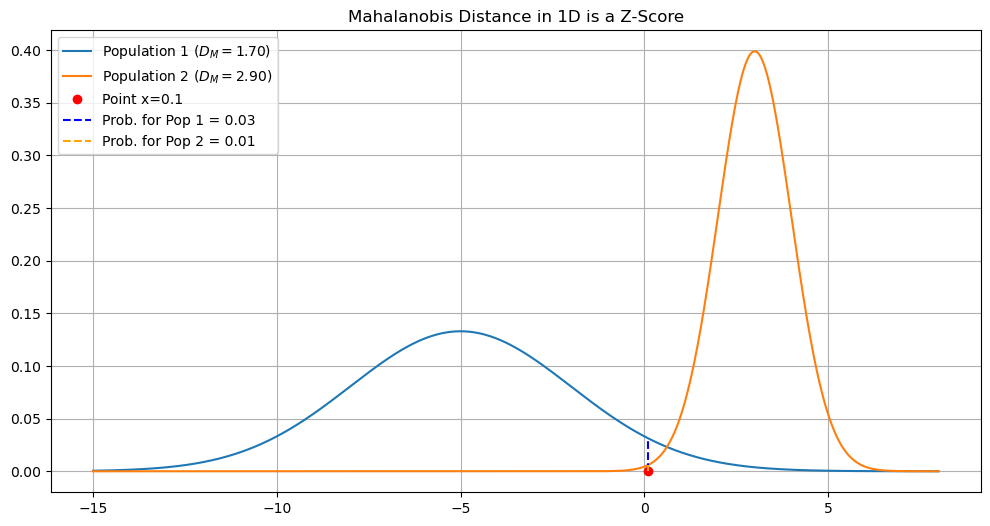

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_1 = -5
mu_2 = 3
sigma_1 = 3
sigma_2 = 1

g1 = norm(mu_1, sigma_1)
g2 = norm(mu_2, sigma_2)

x = 0.1

# Calculate the 1D Mahalanobis Distance (which is just the Z-score)
d1 = np.sqrt(((x - mu_1) / sigma_1)**2)
d2 = np.sqrt(((x - mu_2) / sigma_2)**2)

plt.figure(figsize=(12, 6))
dom = np.linspace(-15, 8, 1000)
plt.plot(dom, g1.pdf(dom), label=f'Population 1 (Mean={mu_1}, $\sigma$={sigma_1})')
plt.plot(dom, g2.pdf(dom), label=f'Population 2 (Mean={mu_2}, $\sigma$={sigma_2})')

# Plot the point and its probability density
plt.plot(x, 0, 'ro', label=f'Point x={x}')
plt.vlines(x, 0, g1.pdf(x), 'b', '--', label=f'Prob. for Pop 1 = {g1.pdf(x):.2f}')
plt.vlines(x, 0, g2.pdf(x), 'orange', '--', label=f'Prob. for Pop 2 = {g2.pdf(x):.2f}')

plt.grid()
plt.legend([f'Population 1 ($D_M={d1:0.2f}$)', f'Population 2 ($D_M={d2:0.2f}$)', 
            f'Point x={x}', f'Prob. for Pop 1 = {g1.pdf(x):.2f}', f'Prob. for Pop 2 = {g2.pdf(x):.2f}'])
plt.title('Mahalanobis Distance in 1D is a Z-Score')
plt.show()

As we can see, even though the red point at $x=0.1$ is *visually* closer to the mean of Population 2 ($\mu_2=3$), it is **probabilistically closer** to Population 1.
* $D_M$ for Population 1 = 1.70 (The point is 1.7 standard deviations from the mean)
* $D_M$ for Population 2 = 2.90 (The point is 2.9 standard deviations from the mean)

This is coherent with the fact that the probability of the point under the blue curve (Pop 1) is higher than under the orange curve (Pop 2). When priors are equal, QDA will assign the point to the class with the **smallest Mahalanobis distance**.

#### Extending to Multiple Dimensions (D > 1)
Now we can understand the multivariate formula. It's the exact same idea, but in $d$-dimensions.

* In 1D, we "normalized" by variance: $(x-\mu) \cdot (\sigma^2)^{-1} \cdot (x-\mu)$
* In $d$-D, we "normalize" by the **Covariance Matrix $\Sigma$**:

$$D_M^2(\mathbf{x}) = (\mathbf{x}-\mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x}-\mathbf{\mu})$$

This formula does what the 1D version did, but it *also* accounts for the **correlation** (rotation) and **scale** of all features simultaneously. It measures the "statistical distance" from a point $\mathbf{x}$ to the center of a multivariate Gaussian $\mathbf{\mu}$, relative to its shape $\mathbf{\Sigma}$.

The 2D plot below shows the same concept..

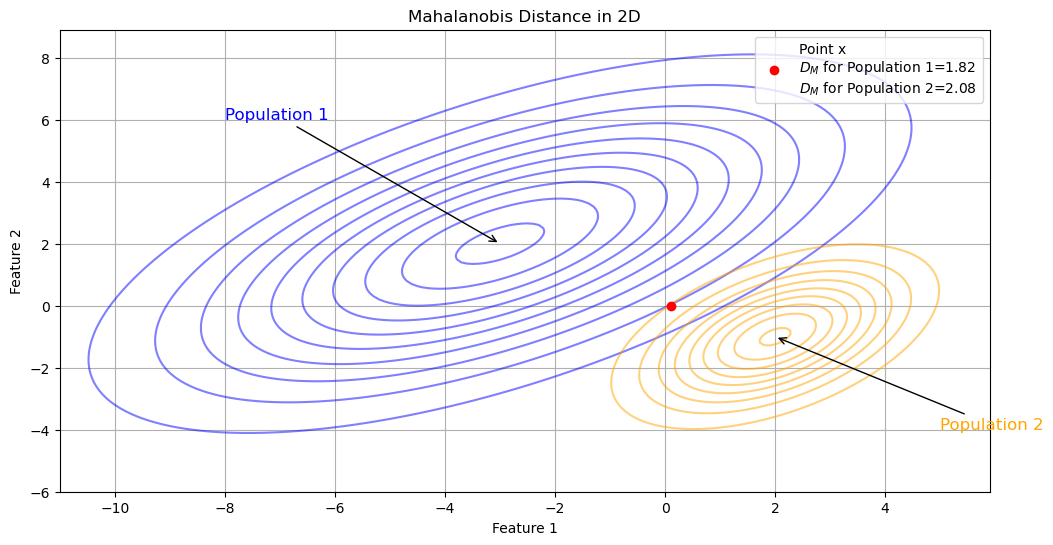

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for Population 1
mu_1 = np.array([-3, 2])
cov_1 = np.array([[3, 1.5], [1.5, 2]]) * 4

# Parameters for Population 2
mu_2 = np.array([2, -1])
cov_2 = np.array([[2, 1], [1, 2]])

# Create multivariate normal distributions
g1 = multivariate_normal(mu_1, cov_1)
g2 = multivariate_normal(mu_2, cov_2)

# Point for Mahalanobis distance calculation
point = np.array([0.1, 0])

# Calculate Mahalanobis distances
d1 = np.sqrt(np.linalg.multi_dot([(point - mu_1).T, np.linalg.inv(cov_1), point - mu_1]))
d2 = np.sqrt(np.linalg.multi_dot([(point - mu_2).T, np.linalg.inv(cov_2), point - mu_2]))

# Create a 2D plot
x, y = np.mgrid[-11:6:0.1, -6:9:0.1]
pos = np.dstack((x, y))

plt.figure(figsize=(12, 6))

# Plot the contours of the multivariate normal distributions
contour1 = plt.contour(x, y, g1.pdf(pos), levels=10, colors='blue', alpha=0.5)
contour2 = plt.contour(x, y, g2.pdf(pos), levels=10, colors='orange', alpha=0.5)

# Add labels for the populations
plt.annotate('Population 1', xy=mu_1, xytext=(-8, 6), 
             arrowprops=dict(facecolor='blue', arrowstyle='->'), color='blue', fontsize=12)
plt.annotate('Population 2', xy=mu_2, xytext=(5, -4), 
             arrowprops=dict(facecolor='orange', arrowstyle='->'), color='orange', fontsize=12)

# Plot the Mahalanobis distance point
plt.plot(point[0], point[1], 'o', color='red', label=f'Point x\n$D_M$ for Population 1={d1:.2f}\n$D_M$ for Population 2={d2:.2f}')

plt.title('Mahalanobis Distance in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Again, the red point is *visually* closer to Population 2, but its Mahalanobis distance ($D_M$) is smaller for Population 1 because it "fits" better with that population's wider, rotated shape.

So, once parameters are fitted, QDA assigns each example to the nearest class in terms of this "smart" Mahalanobis distance, adjusted by the class prior ($\hat{\pi}_k$) and volume ($|\hat{\mathbf{\Sigma}}_k|$). This results in a flexible, quadratic decision boundary, as seen in this example on the Iris dataset below:

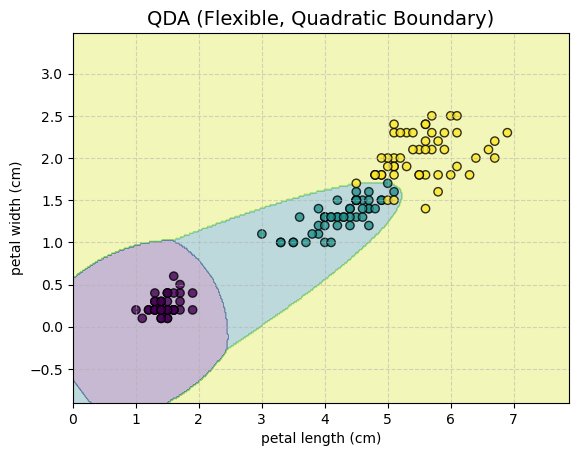

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

# --- 1. Load and Prepare the Iris Data ---
iris = load_iris()
X = iris.data[:, [2, 3]] # Petal length and width
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names[2:]

# --- 2. Fit Both Models ---
# Fit QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

# Fit LDA
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

# --- 3. Create a meshgrid to plot boundaries ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# --- THIS IS THE CORRECTED LINE ---
# I replaced the invalid space character ' ' with a normal space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# -----------------------------------

# --- 4. Get predictions from both models ---
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- 5. Plot Side-by-Side ---

plt.contourf(xx, yy, Z_qda, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('QDA (Flexible, Quadratic Boundary)', fontsize=14)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Limitations of QDA
A quick look at how QDA computes its parameters reveals that QDA is **very computationally expensive**. 

If we have $d$ features, each $\hat{\mathbf{\Sigma}}_k$ matrix has $\frac{d(d+1)}{2}$ unique parameters to estimate. For $d=100$ features, this is over 5,000 parameters, and we must do this *for every single class*. 

This is highly prone to overfitting, which limits the practical applicability of QDA.

## Linear Discriminant Analysis (LDA)
**Linear Discriminant Analysis (LDA)** introduces a first simplification in QDA which allows to make it much more stable, reducing the number of parameters that need to be computed in order to fit the model.

### The LDA Assumption

LDA makes one key compromise: it assumes that while the class means $\mathbf{\mu}_k$ are different, **all classes share the *same* covariance matrix**:

$$
\mathbf{\Sigma}_1 = \mathbf{\Sigma}_2 = \ldots = \mathbf{\Sigma}_k = \mathbf{\Sigma}
$$

This simplifies the model, but it also makes it less flexible.

### How LDA "Learns": Estimating the Parameters

The "training" process is similar to QDA, but with one crucial difference in Step 3:

**1. Estimate the Priors ($\hat{\pi}_k$):**
This is identical to QDA.
$$
\hat{\pi}_k = \frac{N_k}{N}
$$

**2. Estimate the Class Means ($\hat{\mathbf{\mu}}_k$):**
This is also identical to QDA.
$$
\hat{\mathbf{\mu}}_k = \frac{1}{N_k} \sum_{i: y_i=k} \mathbf{x}_i
$$

**3. Estimate the *Pooled* Covariance Matrix ($\hat{\mathbf{\Sigma}}$):**
This is the key difference. Instead of $k$ separate matrices, we compute a *single*, **pooled covariance matrix** $\hat{\mathbf{\Sigma}}$. This is a weighted average of the individual sample covariance matrices for each class.

$$
\hat{\mathbf{\Sigma}} = \frac{1}{N - K} \sum_{k=1}^K (N_k - 1) \hat{\mathbf{\Sigma}}_k
$$
(where $K$ is the number of classes and $\hat{\mathbf{\Sigma}}_k$ is the sample covariance for class $k$, as defined in the QDA section).

If we plug definition of $\hat{\mathbf{\Sigma}}_k$ in the previous expression, we obtain:

$$
\hat{\mathbf{\Sigma}} = \frac{1}{N - K} \sum_{k=1}^K \sum_{i: y_i=k} (\mathbf{x}_i - \hat{\mathbf{\mu}}_k)(\mathbf{x}_i - \hat{\mathbf{\mu}}_k)^T
$$

which allows to estiamte the matrix $\hat{\mathbf{\Sigma}}$ directly from data. Note that we are now computing a single matrix which many more data points than before (all data points rather than the subset related to a given class). This makes the process much more stable and less prone to overfitting.

### How LDA Classifies: The "Linear" in LDA

Now, when we plug this *single* $\hat{\mathbf{\Sigma}}$ into our discriminant function $\delta_k(\mathbf{x})$, the math changes.

The original QDA function was:
$$
\delta_k(\mathbf{x}) = -\frac{1}{2}\log(|\hat{\mathbf{\Sigma}}_k|) - \frac{1}{2}(\mathbf{x} - \hat{\mathbf{\mu}}_k)^T \hat{\mathbf{\Sigma}}_k^{-1} (\mathbf{x} - \hat{\mathbf{\mu}}_k) + \log(\hat{\pi}_k)
$$

In LDA, the terms $-\frac{1}{2}\log(|\hat{\mathbf{\Sigma}}|)$ and the quadratic part $\mathbf{x}^T \hat{\mathbf{\Sigma}}^{-1} \mathbf{x}$ are now *the same for all classes $k$*. Since they are constant with respect to $k$, they drop out of the $\arg \max$ comparison.

The discriminant function simplifies to a **linear discriminant function**:

$$
\delta_k(\mathbf{x}) = \mathbf{w}_k^T \mathbf{x} + w_{k0}
$$
where:
$$
\mathbf{w}_k = \hat{\mathbf{\Sigma}}^{-1}\hat{\mathbf{\mu}}_k
$$
$$
w_{k0} = -\frac{1}{2} \hat{\mathbf{\mu}}_k^T \hat{\mathbf{\Sigma}}^{-1} \hat{\mathbf{\mu}}_k + \log(\hat{\pi}_k)
$$

Because the final decision function $\delta_k(\mathbf{x})$ is a linear function of $\mathbf{x}$, the decision boundaries between any two classes will always be a **straight line (or hyperplane)**.

### LDA Example in Python: Iris Dataset

Let's compare LDA directly to QDA on our Iris dataset. We expect to see straight-line boundaries instead of the curved ones from QDA.

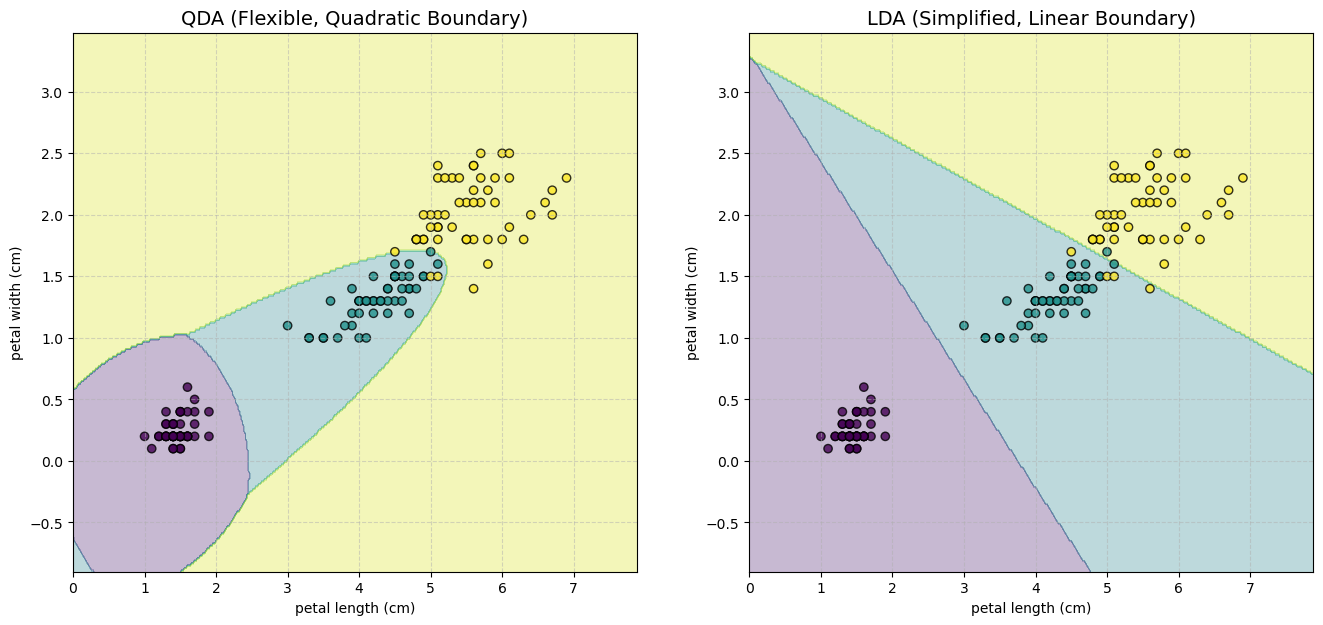

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

# --- 1. Load and Prepare the Iris Data ---
iris = load_iris()
X = iris.data[:, [2, 3]] # Petal length and width
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names[2:]

# --- 2. Fit Both Models ---
# Fit QDA (from previous example)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

# Fit LDA
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

# --- 3. Create a meshgrid to plot boundaries ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# --- 4. Get predictions from both models ---
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- 5. Plot Side-by-Side ---
plt.figure(figsize=(16, 7))

# Plot QDA
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_qda, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('QDA (Flexible, Quadratic Boundary)', fontsize=14)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True, linestyle='--', alpha=0.5)

# Plot LDA
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_lda, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('LDA (Simplified, Linear Boundary)', fontsize=14)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Interpretation and Limitations of LDA

The comparison is clear:
* **QDA (Left)** learns flexible, curved boundaries that try to wrap around the unique shape of each class.
* **LDA (Right)** is constrained to using straight lines. It cannot curve to fit the `versicolor` and `virginica` classes as tightly.

This is the **Bias-Variance Tradeoff** in action:
* **QDA** has **low bias** (it's flexible) but **high variance** (it's prone to overfitting, especially with many features).
* **LDA** has **higher bias** (it's "biased" to linear boundaries) but **lower variance** (it's more stable, less likely to overfit, and requires less data).

LDA is a good compromise, but for *very* high-dimensional data (like $d=10,000$ features for text), estimating even *one* full covariance matrix $\hat{\mathbf{\Sigma}}$ is still impossible. This leads us to our final and most extreme simplification: Naive Bayes.

## Naive Bayes: The Final Simplification
While LDA makes it easier to fit the model to the data, it can still be very computationally demanding.

Indeed, for **very high-dimensional data** ($d=10,000$ features, like in text classification), estimating even *one* full covariance matrix $\hat{\mathbf{\Sigma}}$ can be computationally and statistically challenging. This is an aspect of the **Curse of Dimensionality**.

This leads us to our final and most extreme simplification: **Naive Bayes**.

### The "Naive" Assumption
Recall that our problem is estimating

$$P\left( X \middle| Y \right)$$

Considering a multidimensional $X=(X_1,X_2,\ldots,X_n)$, we may factorize the expression above as follows:

$$P\left( X \middle| Y \right) = P\left( X_{1},\ldots,X_{n} \middle| Y \right) = P\left( X_{1} \middle| Y \right)P\left( X_{2} \middle| X_{1},Y \right)P\left( X_{3} \middle| X_{2},X_{1},Y \right)\ldots P(X_{n}|X_{1},\ldots,X_{n - 1},Y)$$

However, this is not a very helpful factorization as the terms
$P(X_{i}|X_{1},\ldots,X_{i - 1},C)$ are conditioned also on other
features, which makes them not easy to model.

The Naive Bayes classifier makes one, very strong ("naive") assumption:

> It assumes that all features $X_i$ are **conditionally independent** given the class $Y=k$.

This can be written as follows:

$$X_{i}\bot X_{j}\ |\ Y,\ \forall i \neq j$$

> **Spam Classification Example**
> Let's assume a spam classification example and imagine that features $X_{i}$ and $X_{j}$ are related to the 
> number of appearance of specific words in the current email represented by $X$.
> If $X_{i}$ and $X_{j}$ are **word counts**, then we are saying that if I
> take all non-spam e-mails, then the number of occurrences of a given
> word **does not influence** the number of occurrences of **another
> word**. This is **obviously not true in general!** For instance, there
> can be legitimate e-mails of different topics. If the e-mail is about a
> vacation, the words 'trip', 'flight', 'luggage' will appear often.
> Instead, if the e-mail is about work, the words 'meeting', 'report',
> 'time', will appear more often. This means that, within the same
> category (non-spam e-mails), the number of occurrences of a word (e.g.,
> 'trip') may be related to the number of occurrences of another words
> (e.g., 'flight'), which breaks the assumption of **conditional
> independence**. This is why this assumption is called **naïve
> assumption**. With this in mind, it should be considered that, despite
> such naïve assumption, the Naïve Bayes Classifier works surprisingly
> well in many contexts.

We know that:

$$X\bot Y|Z \Leftrightarrow P\left( X,Y|Z \right) = P\left( X|Z \right)P\left( Y|Z \right)$$

Hence, we discover that, under the assumption of conditional
independence:

$$P\left( X_{1},\ldots,X_{n} \middle| Y \right) = P\left( X_{1} \middle| Y \right)P\left( X_{2} \middle| Y \right)\ldots P(X_{n}|Y)$$

So, we can re-write the MAP classification rule as:

$$f(\mathbf{x}) = \arg_{k}max\ P\left( \mathbf{x}_{1} \middle| Y=k \right)\left( \mathbf{x}_{2} \middle| Y=k \right)\ldots P\left( \mathbf{x}_{n} \middle| Y=k \right)P(Y=k)$$

### Flavors of Naive Bayes

The single $P(X_{1}|Y=k)$ terms are now easy to model, since $X_{1}$ is
mono-dimensional. In practice, depending on the considered problem, we
can model these terms in different ways. Two common approaches,
depending on the kind of data we have, are to use a **Gaussian distribution** or a
**Multinomial distribution**.

When we use Gaussian distributions to model the $P(X_{i}|Y)$ terms, the
classification method is called "**Gaussian Naïve Bayes**". Similarly, if we
consider a multinomial distribution, the classification method is called
"**Multinomial Naïve Bayes**".


### A note on computational complexity
Note that Naive Bayes "solves" the computational complexity problem of QDA and LDA. Indeed:
* **QDA** had to estimate $\sim k \times d^2/2$ parameters.
* **LDA** had to estimate $\sim d^2/2$ parameters.
* **Naive Bayes** only has to estimate $\sim k \times d$ parameters.

Instead of one giant, complex $d$-dimensional problem, we now have $d$ tiny, 1-dimensional problems.

### Gaussian Naïve Bayes

Let us consider again our sex classification example based on height and
weight. We will consider $X = \lbrack H,W\rbrack$, which are random
variables representing heights and weights of subjects. If we assume
that the data is approximately Gaussian, the probabilities $P(H|C)$ and
$P(W|C)$ can be modeled with univariate (1D) Gaussian distributions.
This is done by first obtaining four samples:

-   $H_{1}$: the heights of subjects when $C = 1$;

-   $W_{1}$: the weights of subjects when $C = 1;$

-   $H_{0}$: the heights of subjects when $C = 0$;

-   $W_{0}$: the weights of subjects when $C = 0.$

> We hence model each sample as a 1D Gaussian distribution by computing
> a mean and a variance value from each of these samples to obtain four
> Gaussian distributions:

-   $P\left( H = h \middle| C = 0 \right) = N(x;\mu_{1},\sigma_{1})$;

-   $P\left( W = w \middle| C = 0 \right) = N(x;\mu_{2},\sigma_{2})$;

-   $P\left( H = h \middle| C = 1 \right) = N(x;\mu_{3},\sigma_{3})$;

-   $P\left( W = w \middle| C = 1 \right) = N(x;\mu_{4},\sigma_{4})$;

After this, we can apply the classification rule:

-   The example $(h,w)$ is classified as class 1 if

$P\left( h \middle| C = 1 \right)P\left( w \middle| C = 1 \right)P(C = 1) > P\left( h \middle| C = 0 \right)P\left( w \middle| C = 0 \right)P(C = 0)$;

-   The example $(h,w)$ is classified as class 0 otherwise.

We can exemplify this process as follows:

![](../_static/lecture_specific/classification/map_weight3.png)

### Gaussian Naive Bayes and QDA
We will not see it in details, but it can be shown that a **Gaussian Naive Bayes classifier is equivalent to a Quadratic Discriminant Analysis classifier with diagonal covariance matrices**. By forcing the covariance matrices to have zeros on all off-diagonal elements, we are assuming that variables are **conditionally independent with respect to classes** (hence independent within each class).

The figure below compares a Quadratic Discriminant Analysis classifier with a Gaussian Naive Bayes on the same data:

As we can see, in both cases, decision boundaries are non-linear. This happens because we did not constrain all covariance matrices to be the equal.

Differently from QDA, in Gaussian Naive Bayes, the fitted Gaussians are **aligned to the axes**, which is due to the naive assumption. This brings some differences in the decision boundary as shown below:

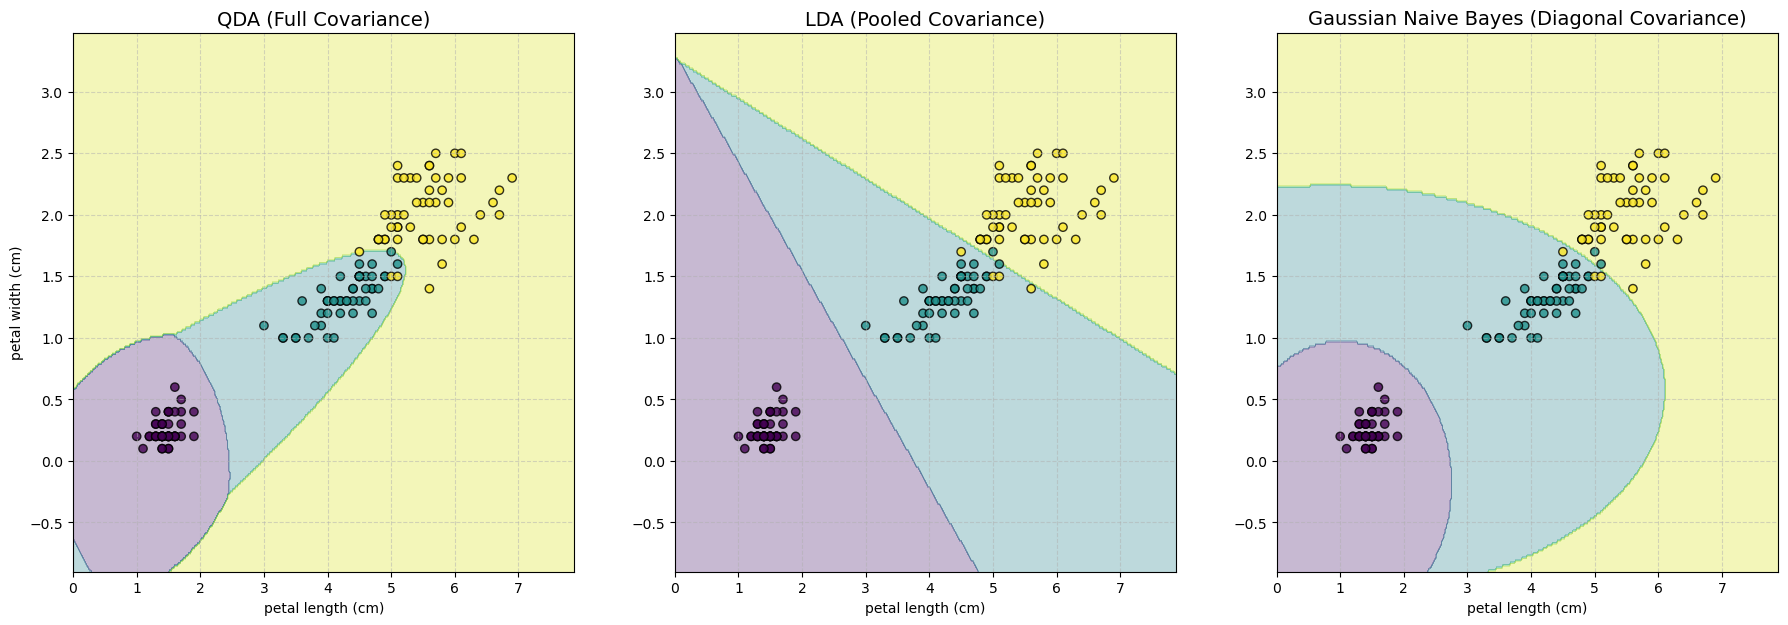

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal

# --- 1. Load and Prepare the Iris Data ---
iris = load_iris()
X = iris.data[:, [2, 3]] # Petal length and width
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names[2:]

# --- 2. Fit All Three Models ---
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

gnb = GaussianNB()
gnb.fit(X, y)

# --- 3. Create a meshgrid to plot boundaries ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# --- 4. Get predictions from all models ---
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_gnb = gnb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- 5. Plot Side-by-Side-by-Side ---
plt.figure(figsize=(22, 7))

# Plot QDA
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_qda, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('QDA (Full Covariance)', fontsize=14)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True, linestyle='--', alpha=0.5)

# Plot LDA
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_lda, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('LDA (Pooled Covariance)', fontsize=14)
plt.xlabel(feature_names[0])
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Gaussian Naive Bayes
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_gnb, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
plt.title('Gaussian Naive Bayes (Diagonal Covariance)', fontsize=14)
plt.xlabel(feature_names[0])
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

This figure perfectly summarizes the three models:
* **QDA (Left):** Most flexible. It learns a separate, *rotated* ellipse (full $\mathbf{\Sigma}_k$) for each class. Its boundaries are quadratic.
* **LDA (Middle):** The compromise. It learns *one* pooled, *rotated* ellipse (full $\mathbf{\Sigma}$) and uses it for all classes. Its boundaries are linear.
* **GNB (Right):** Most simple. It learns a separate, *axis-aligned* ellipse (diagonal $\mathbf{\Sigma}_k$) for each class. Its boundaries are quadratic but can't capture any feature correlation (tilt).

### Summary: A Family of Assumptions

These three generative models are a "family" of classifiers based on different assumptions about the class covariance matrix $\mathbf{\Sigma}_k$.

| Model | Assumption about $\mathbf{\Sigma}_k$ | Resulting Boundary |
| :--- | :--- | :--- |
| **QDA** | Each class has its **own, full** $\mathbf{\Sigma}_k$. | Quadratic |
| **LDA** | All classes **share one, full** $\mathbf{\Sigma}$. | Linear |
| **GNB** | Each class has its **own, diagonal** $\mathbf{\Sigma}_k$. | Quadratic (Axis-Aligned) |

We trade flexibility (QDA) for stability and computational efficiency (LDA, GNB) by making progressively "stronger" or "more naive" assumptions.

### Multinomial Naïve Bayes

In the previous examples, we have considered cases in which the input
features are continuous. In these cases, indeed, it can make sense to
**estimate likelihoods using continuous probability distributions**
(PDF) such as the Gaussian distribution. When the input features are
discrete instead, it makes sense to **approximate them as probability
mass functions (PFM)**.

Let us consider for instance the case of **text classification**. If we
represent text using word counts (bag of words representation), the
input features will be **discrete**. In particular, given a vocabulary
$V$ of size $n$, the input features will be tuples of $n$ natural
numbers:

$$\mathbf{x} = (x_{1},x_{2},x_{3},\ldots,x_{n})$$

with $x_{i} \in N$ being the number of times [the term]{.ul} $i$
[appears in document]{.ul} $\mathbf{x}$[.]{.ul}

Hence, the probability of a given document **x**, given its class (the
likelihood) can be modeled as

$$P(x_{1},\ldots,x_{n}|c)$$

If we assume the **naïve hypothesis**, then we are saying that, [given
documents of a fixed class]{.ul}, the number of times that word $i$
appears in the text is independent of the number of times that word $j$
appears in the text.

[If we imagine the process of writing a document as the one of picking
words from the vocabulary]{.ul} $V$[, then, chosen a class]{.ul}
$C = c$[, we can model the probability]{.ul}
$P(x_{1},\ldots,x_{n}|C = c)$ [with a **multinomial distribution**.
Recall that we need to estimate a different multinomial distribution for
each possible value of]{.ul} $C$[.]{.ul}

Remember that **the multinomial distribution models the probability of
obtaining exactly**
$\mathbf{(}\mathbf{n}_{\mathbf{1}}\mathbf{,\ldots,}\mathbf{n}_{\mathbf{k}}\mathbf{)}$
**occurrences with**
$\mathbf{n}\mathbf{=}\sum_{\mathbf{i}}^{}\mathbf{n}_{\mathbf{i}}$ **for
each of** $\mathbf{k}$ **possible outcomes in a sequence of**
$\mathbf{n}$ **independent experiments which follow categorical
distributions with probabilities**
$\mathbf{p}_{\mathbf{1}}\mathbf{,\ldots,}\mathbf{p}_{\mathbf{k}}$.

In our case, the individual "experiments" consist in the process of
generating a word. We can assume that this process follows a categorical
distribution with some words being more common than others. These
experiments are *independent* because of the naïve assumption.

To characterize our multinomial distribution, we need to fix/estimate
some parameters:

-   **Number of experiments**: the number of words in the document. This
    will be the sum of the features $\sum_{i}^{}x_{i}$.

-   **Number of possible outcomes**: the number of words in the
    vocabulary.

-   **Probability of each outcome**[: the probability of generating a
    word, given the class]{.ul}. We will call this probability
    $p_{\text{ci}}$. The most common way to evaluate this term is by
    **counting the number of times that each word appears in all
    documents of a given class**.

Hence, we can solve text classification with MAP using the expression:

$$f\left( x_{1},\ \ldots,x_{n} \right) = \arg_{c}\text{max~}P\left( x_{1},x_{2},\ldots,c_{n} \middle| c \right)P\left( c \right)$$

Using the analytical form of the multinomial distribution:

$$f\left( x_{1},\ \ldots,x_{n} \right) = \arg_{c}\text{max~}P\left( c \right)\frac{(\sum_{i}^{}x_{i})!}{x_{1}!\ldots x_{n}!}p_{c1}^{x_{1}} \cdot p_{c2}^{x_{2}} \cdot \ldots \cdot p_{\text{cn}}^{x_{n}}$$

We can note that, similarly to the evidence $P(X)$, the term
$\frac{(\sum_{i}^{}x_{i})!}{x_{1}!\ldots x_{n}!}$ is independent from
$c$ and hence we can safely ignore it if our aim is not to compute
probability values:

$$f\left( x_{1},\ \ldots,x_{n} \right) = \arg_{c}\text{max~}P\left( c \right)p_{c1}^{x_{1}} \cdot p_{c2}^{x_{2}} \cdot \ldots \cdot p_{\text{cn}}^{x_{n}}$$

#### Estimating the Terms $p_{\text{ci}}$ and $P(c)$

We can model the terms $p_{\text{ci}}$ in a frequentist way as follows:

$$p_{\text{ci}} = \frac{\sum_{j}^{}{\left\lbrack y^{\left( j \right)} = c \right\rbrack x_{i}^{(j)}}}{\sum_{j}^{}{\sum_{k}^{}{\lbrack y^{(j)} = c\rbrack x_{k}^{(j)}}}}$$

Where $\left\lbrack \cdot \right\rbrack$ denotes the Iverson bracket,
which is defined as:

$$\left\lbrack x \right\rbrack = \left\{ \begin{matrix}
1\ \text{if}\ x\ \text{is}\ \text{true} \\
0\ \text{ot}h\text{erwise} \\
\end{matrix} \right.\ $$

Hence, in the expression above:

-   The numerator counts the number of times word $i$ appears in
    documents of class $c$;

-   The denominator counts all the words appearing in all documents of
    class $c$;

-   Hence, the expression is **the fraction of times word i appears
    among all words in documents of class c**;

In practice, since some words can have zero occurrences, we perform
'Laplacian smoothing' by adding a "1" to each term as follows:

$$p_{\text{ci}} = \frac{\sum_{j}^{}{\left\lbrack y^{\left( j \right)} = c \right\rbrack x_{i}^{(j)} + 1}}{\sum_{j}^{}{(\sum_{i}^{}{\left\lbrack y^{\left( j \right)} = c \right\rbrack x_{i}^{\left( j \right)} + 1)}}}$$

This allows to make sure that we do not divide by zero.

We can estimate the prior probability as:

$$p\left( c \right) = \frac{\sum_{j}^{}{\lbrack y^{\left( j \right)} = c\rbrack}}{N}$$

where $N$ is the total number of documents. Alternatively, we can assume
uniform priors and set:

$$P\left( c \right) = \frac{1}{M}$$

### Flavor 2: Multinomial Naive Bayes (MNB)

In the previous section, we used **Gaussian Naive Bayes (GNB)**, which is ideal for **continuous features** (like `petal_length`) that we can model with a Gaussian (bell curve).

But what about **discrete count data**? The most common example is **text classification** (e.g., spam filtering).

If we represent text using a "Bag of Words" (BoW), our features $\mathbf{x}$ are a vector of word counts:
$$\mathbf{x} = (x_1, x_2, \ldots, x_d)$$
where $x_i$ is the number of times word $i$ from our vocabulary appears in the document.

We can't model this with a Gaussian. We need a different model for the likelihood $P(X_i | Y=k)$. For count data, we use a **Multinomial Distribution**.

This leads to **Multinomial Naive Bayes (MNB)**.

### The "Bag of Words" Intuition

The "naive" assumption here is that *given the class*, the appearance of one word is independent of the appearance of another.
> "If we know an email is 'Spam', the probability of seeing the word 'free' has no effect on the probability of seeing the word 'offer'."

This is obviously false (those words are highly correlated!), but the model is surprisingly effective.

Under this assumption, a generative model for text is incredibly simple. To "learn," the model just builds a separate probability table for each class.

A "trained" Multinomial Naive Bayes model for `Class='Spam'` is just a big lookup table:
* $P(\text{word}='viagra' | \text{Class='Spam'}) = 0.05$
* $P(\text{word}='offer' | \text{Class='Spam'}) = 0.02$
* $P(\text{word}='meeting' | \text{Class='Spam'}) = 0.0001$

And it builds a *different* table for `Class='Ham'`:
* $P(\text{word}='viagra' | \text{Class='Ham'}) = 0.0001$
* $P(\text{word}='offer' | \text{Class='Ham'}) = 0.001$
* $P(\text{word}='meeting' | \text{Class='Ham'}) = 0.03$

### Estimating the Word Probabilities ($p_{ki}$)

How do we build those tables? We just count words.

We'll call the probability of word $i$ for class $k$ as $p_{ki}$. The Maximum Likelihood Estimate (MLE) is:

$$
p_{ki} = \frac{\text{Total count of word } i \text{ in all documents of class } k}{\text{Total count of *all words* in all documents of class } k}
$$

In formula terms (where $x_i^{(j)}$ is the count of word $i$ in document $j$):
$$
p_{ki} = \frac{\sum_{j \text{ in class } k} x_i^{(j)}}{\sum_{l=1}^d \left( \sum_{j \text{ in class } k} x_l^{(j)} \right)}
$$

### A Critical Flaw: The Zero-Probability Problem

What happens if we get a new email that contains the word "crypto"?

If our training data for `Class='Spam'` *never* contained the word "crypto," then our estimated probability is:
$P(\text{word}='crypto' | \text{Class='Spam'}) = 0$

When we try to classify this email using the MAP rule, we have to multiply all the probabilities:
$$P(\text{Spam} | \mathbf{x}) \propto P(\text{Spam}) \times P('crypto' | \text{Spam}) \times P(\text{'offer'} | \text{Spam}) \times \ldots$$
$$P(\text{Spam} | \mathbf{x}) \propto P(\text{Spam}) \times 0 \times 0.02 \times \ldots = 0$$

Because of this one **zero**, the entire score for the "Spam" class becomes zero, even if all other words (like "viagra" and "offer") are strong indicators. The model breaks.

### The Solution: Laplace (Add-One) Smoothing

The fix is simple: we pretend we've seen every word in our vocabulary *at least one time* before we start. This is called **Laplace Smoothing** or "Add-One" smoothing.

Our new formula for $p_{ki}$ becomes:

$$
p_{ki} = \frac{\text{Count(word } i \text{ in class } k) + 1}{(\text{Total words in class } k) + |V|}
$$

Where **$|V|$** is the size of our entire vocabulary (e.g., 20,000). We add 1 to the numerator (for word $i$) and we add $|V|$ to the denominator (one for *each* unique word we're pretending to have seen).

This ensures that no probability is ever zero, and our model is robust to new words.

### The Final Classification Rule

Now we can use our MAP classifier. To classify a new document $\mathbf{x} = (x_1, \ldots, x_d)$:

$$h(\mathbf{x}) = \arg \max_{k} P(Y=k) \prod_{i=1}^d P(X_i = x_i | Y=k)$$

Given that $P(X_i = x_i | Y=k)$ is the probability of *our* word $p_{ki}$ raised to the power of *how many times we saw it* ($x_i$), the final formula is:

$$
h(\mathbf{x}) = \arg \max_{k} \underbrace{P(Y=k)}_{\text{Prior}} \cdot \underbrace{p_{k1}^{x_1} \cdot p_{k2}^{x_2} \cdot \ldots \cdot p_{kd}^{x_d}}_{\text{Likelihood Product}}
$$

### The Practical Way: Log-Probabilities

One last problem: that formula is **computationally unstable**.

You are multiplying thousands of tiny probabilities together (e.g., $0.001 \times 0.0004 \times \ldots$). This number gets so small that it causes **arithmetic underflow**, and the computer rounds it to 0.

**The Solution:** Use logarithms.
Since $\log(a \cdot b) = \log(a) + \log(b)$, and the $\log$ function is monotonic (it doesn't change the `arg max`), we can maximize the *log-probability* instead:

$$
\log(P(Y=k) \cdot p_{k1}^{x_1} \cdot \ldots \cdot p_{kd}^{x_d}) = \log P(Y=k) + x_1 \log p_{k1} + \ldots + x_d \log p_{kd}
$$

The **final classification rule** that computers *actually* use is a simple, fast sum:

$$
h(\mathbf{x}) = \arg \max_{k} \left( \log P(Y=k) + \sum_{i=1}^d x_i \cdot \log p_{ki} \right)
$$

This is much more stable and is the foundation of Multinomial Naive Bayes for text.

## References

-   Naïve Bayes Classifier: https://en.wikipedia.org/wiki/Naive_Bayes_classifier;
-   https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda
-   Section 4.4 of \[1\]

\[1\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com